<a href="https://colab.research.google.com/github/mukeshjnv/Netflix-Movies-and-TV-shows-Clustring-Unsupervised-Learning/blob/main/Capston_Project_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [11]:
# loading Data
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
temp_df=df.copy()

#1.Know Your Data

In [4]:
# top five rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# bottm five rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
# data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


some colomns contain null values. We need to remove it before we use for building clusters.

In [12]:
# removing nll values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4808 non-null   object
 1   type          4808 non-null   object
 2   title         4808 non-null   object
 3   director      4808 non-null   object
 4   cast          4808 non-null   object
 5   country       4808 non-null   object
 6   date_added    4808 non-null   object
 7   release_year  4808 non-null   int64 
 8   rating        4808 non-null   object
 9   duration      4808 non-null   object
 10  listed_in     4808 non-null   object
 11  description   4808 non-null   object
dtypes: int64(1), object(11)
memory usage: 488.3+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4808 non-null   object
 1   type          4808 non-null   object
 2   title         4808 non-null   object
 3   director      4808 non-null   object
 4   cast          4808 non-null   object
 5   country       4808 non-null   object
 6   date_added    4808 non-null   object
 7   release_year  4808 non-null   int64 
 8   rating        4808 non-null   object
 9   duration      4808 non-null   object
 10  listed_in     4808 non-null   object
 11  description   4808 non-null   object
dtypes: int64(1), object(11)
memory usage: 488.3+ KB


Now the dataset is cleaned from NULL Values.

In [14]:
# Let's check for duplicate values
df.duplicated().sum()

0

No duplicate values

In [15]:
df.describe()

,release_year
count,4808.000000
mean,2012.710275
std,9.521541
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


is that just one numeric feature? No. <br>

feature "duration" and "date_added" are also numeric but these are not in proper format. their values are in string and contain minutes.

Let's clean them.

In [17]:
df['duration']

1         93 min
2         78 min
3         80 min
4        123 min
5       1 Season
          ...   
7778      88 min
7780      94 min
7781      88 min
7782      99 min
7783     111 min
Name: duration, Length: 4808, dtype: object

As it also contains duration in format such as 1 season, 2 season etc... which basically represents the sequence of season. How to deal with it?

Asuming each season is on an average 45 minutes long.

In [19]:
#Let's check no of movies and seasons
df['duration'].apply(lambda x: 'movies' if x[-3:]=='min' else 'season').value_counts()

movies    4673
season     135
Name: duration, dtype: int64

There are very few seasons.

In [20]:
# Now let's check number of TV shows
df['type'].value_counts()

Movie      4673
TV Show     135
Name: type, dtype: int64

It confirms that durations of tv shows are given in seasons

In [21]:
def to_minutes(duration):
  ''' to calculate time in min '''
  
  if 'Season' in duration:
    return 45
  else:
    return int(duration[:-4])

In [22]:
df['duration']=df['duration'].apply(lambda x:to_minutes(x))

In [23]:
df['duration'].describe()

count    4808.000000
mean      100.788062
std        27.727466
min         8.000000
25%        88.000000
50%        99.000000
75%       116.000000
max       253.000000
Name: duration, dtype: float64

* 25% of movies are approxmately longer than 2 hours. <br>
* Max duration of a movies is more that 4 hours. is it possible? Let's check.<br>
* Can a movie be a minimum of 8 minutes? No, It is not possible. So, what could be the minimum length of a movie?

I will come to this discussion later in univariate analysis.

#2.EDA

##2.1Univariate analysis

### type

Text(0, 0.5, 'Numbers')

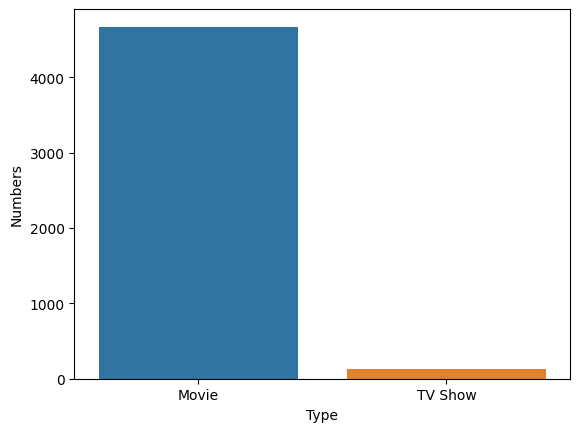

In [114]:
sns.countplot(data=df, x='type')
plt.xlabel('Type')
plt.ylabel('Numbers')

* There are just two types of shows. Movies and TV shows. Most of the shows are movies.
* TV shows on netflix are very few.

### director

<Axes: >

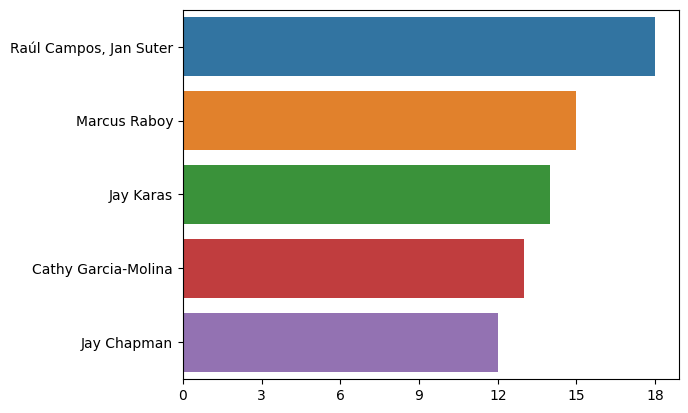

In [54]:
# top  5 directors by number of movies listed on netflix
y=df['director'].value_counts()[:5].values
x=df['director'].value_counts()[:5].index
plt.xticks(np.arange(0,20,3))
sns.barplot(y=x, x=y)

### country

#### top 5 bar plot

In [115]:
df['country'].nunique()

544

* No of countries are 544. is it true? ofcourse not. we need some data cleaning works in this column.

<Axes: >

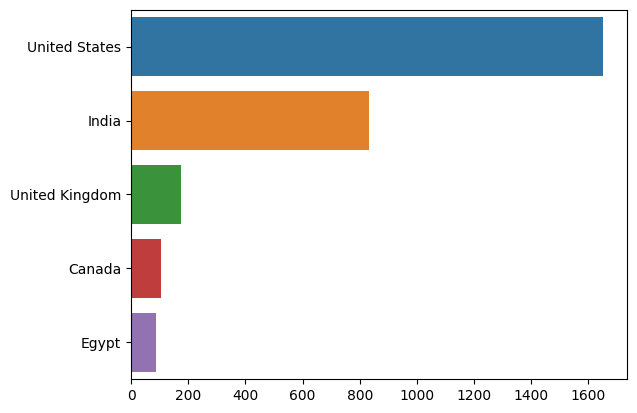

In [55]:
# top 5 contries by no of movies listed

y=df['country'].value_counts()[:5].values
x=df['country'].value_counts()[:5].index
sns.barplot(y=x, x=y)

maximum numbers of movies are listed from USA follwed by India and UK.

#### top 3 and rest box plot

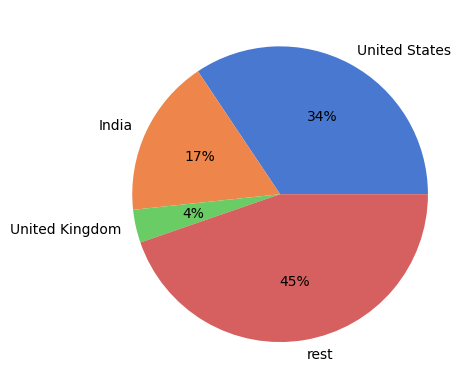

In [102]:
top_3_val=df['country'].value_counts()[:3].values
top_3_name=df['country'].value_counts()[:3].index.tolist()
data=np.hstack((top_3_val, np.array(df.shape[0]-sum(top_3_val)) ))
keys=top_3_name+['rest']

# define Seaborn color palette to use
palette_color = sns.color_palette('muted')
  
# plotting data on chart
plt.pie(data.flatten(), labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

* 55% of shows listed on netflix comprises of just from three countries.




### release_year

In [106]:
df['release_year'].describe()

count    4808.000000
mean     2012.710275
std         9.521541
min      1942.000000
25%      2011.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

* Movies listed on netflix is from year 1942 to year2021

<Axes: >

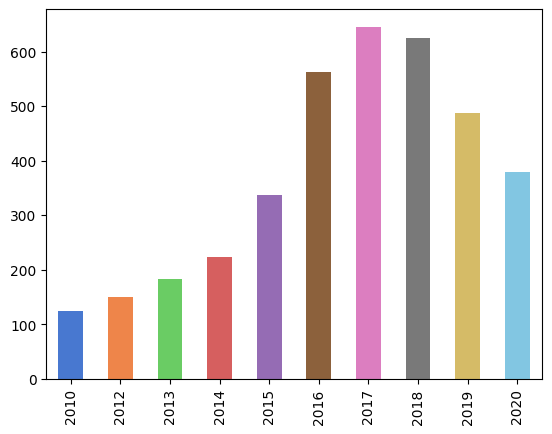

In [113]:
# Let's see trend of listing of recently relesed movies
palette_color = sns.color_palette('muted')
df['release_year'].value_counts()[:10].sort_index(ascending=True).plot(kind='bar', color=palette_color)

* most of the movies listed on netflix are relesed in year 2017 followed by 2018 and 2016.

### rating

In [116]:
df['rating'].nunique()

14

In [117]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [118]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Kids', 'Older Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

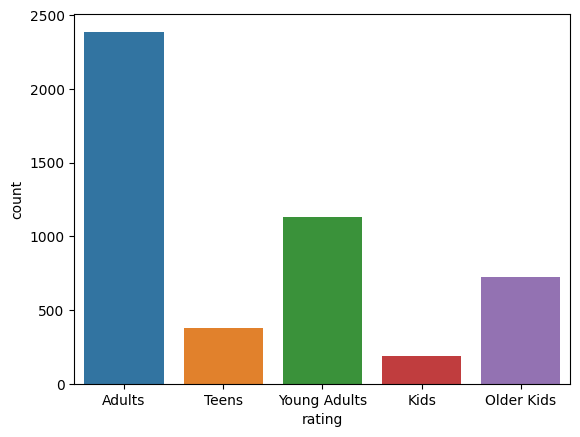

In [119]:
sns.countplot(x='rating',data=df)

* Higest number of shows on Netflix is rated by Adults followd by Young Adults rating and older kids.

### duration

<Axes: ylabel='Frequency'>

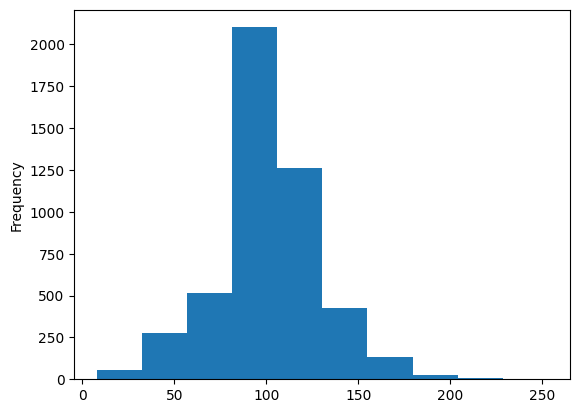

In [122]:
df['duration'].plot(kind='hist')

* Most of the movies listed on netflix is 90 mins to 120 mins long.

<Axes: >

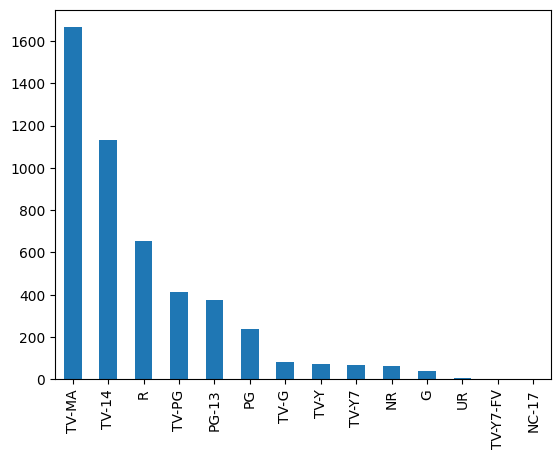

In [ ]:
df['rating'].value_counts().plot(kind='bar')

We do not have much undersanding about the rating types.

FIND OUT?


**duration** <br>
Converting it to datetime frame

In [ ]:
def to_minutes(duration):
  ''' to calculate time in min '''
  
  if 'Season' in duration:
    return 50
  else:
    return int(duration[:-4])

In [ ]:
df['duration']=df['duration'].apply(lambda x:to_minutes(x))

<Axes: ylabel='Frequency'>

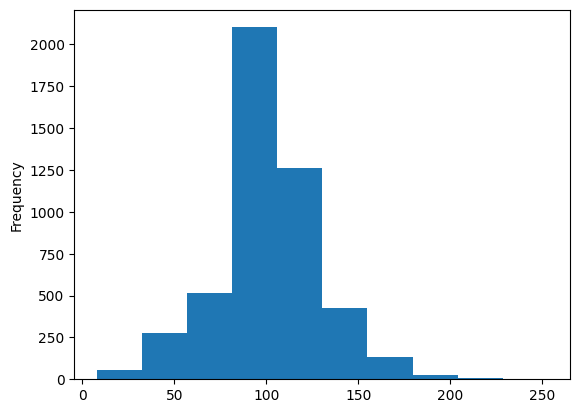

In [ ]:
df['duration'].plot(kind='hist')

normaly dustributed

In [ ]:
df['listed_in']

1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
5         International TV Shows, TV Dramas, TV Mysteries
                              ...                        
7778                              Comedies, Horror Movies
7780     Dramas, Independent Movies, International Movies
7781                   Children & Family Movies, Comedies
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 4808, dtype: object

#**Feature Engineering**

In [ ]:
#total number of genres
genres_set=set()
for items in df['listed_in']:
  for item in items:
    genres_set.add(item)


In [ ]:
len(genres_set)

43

So we can not create so many 43 features.

<Axes: ylabel='Frequency'>

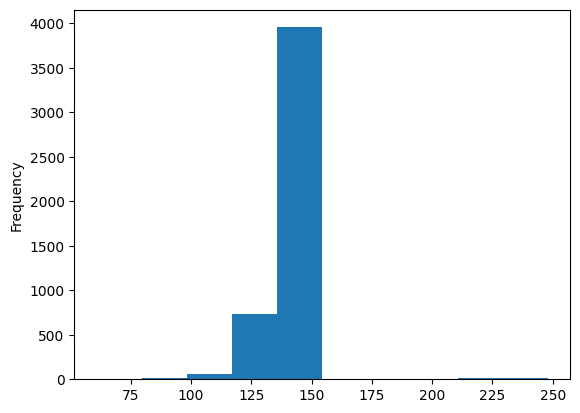

In [ ]:
df['description'].apply(lambda x:len(x)).plot(kind='hist')

Most of the descriptions are about 150 words long.As description about a movie has some keywords that can help inidentifying the viewers like. Therefore I believe topic modeling is required for creating some potential topic and training clustring algorithm on top of that.

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

def to_minutes(duration):
  ''' to calculate time in min '''
  
  if 'Season' in duration:
    return 50
  else:
    return int(duration[:-4])

df['duration']=df['duration'].apply(lambda x:to_minutes(x))

df['tags']=df['title']+df['cast']+df['director']+df['country']+df['listed_in']+df['description']

# download wordnet
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
df['tags']=df['title']+df['cast']+df['director']+df['country']+df['listed_in']+df['description']

In [ ]:
df['tags']

1       7:19Demián Bichir, Héctor Bonilla, Oscar Serra...
2       23:59Tedd Chan, Stella Chung, Henley Hii, Lawr...
3       9Elijah Wood, John C. Reilly, Jennifer Connell...
4       21Jim Sturgess, Kevin Spacey, Kate Bosworth, A...
5       46Erdal Beşikçioğlu, Yasemin Allen, Melis Birk...
                              ...                        
7778    ZombielandJesse Eisenberg, Woody Harrelson, Em...
7780    ZooShashank Arora, Shweta Tripathi, Rahul Kuma...
7781    ZoomTim Allen, Courteney Cox, Chevy Chase, Kat...
7782    ZozoImad Creidi, Antoinette Turk, Elias Gergi,...
7783    ZubaanVicky Kaushal, Sarah-Jane Dias, Raaghav ...
Name: tags, Length: 4808, dtype: object

##Text Cleaning 
1. Normalize Text
2. Remove Unicode Characters
3. Remove Stopwords 
4. Perform Stemming and Lemmatization

In [ ]:
# download wordnet
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
# use this for text cleaning 

# Normalize Text
text = "Hey 5Amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first FIX THIS ASAP! @AmazonHelp"

text = text.lower()
print('Normalize Text')
print(text)

# Remove Unicode Characters
import re

text = "hey amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first please fix asap! @amazonhelp"

text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
print('Remove Unicode Characters')
print(text)

# Remove Stopwords
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
text = "my package from amazon never arrived fix this asap"
text = " ".join([word for word in text.split() if word not in (stop)])
print('Remove Stopwords')
print(text)

#Perform Stemming and Lemmatization
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

words = ["jump", "jumped", "jumps", "jumping"]
stemmer = PorterStemmer()
print('Stemming')
for word in words:
  print(word + " = " + stemmer.stem(word))

#Lemmatization
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

words = ["jump", "jumped", "jumps", "jumping"]
lemmatizer = WordNetLemmatizer()
print('Lemmatization')
for word in words:
  print(word + " = " + lemmatizer.lemmatize(word))

Normalize Text
hey 5amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first fix this asap! @amazonhelp
Remove Unicode Characters
hey amazon  my package never arrived  please fix asap amazonhelp
Remove Stopwords
package amazon never arrived fix asap
Stemming
jump = jump
jumped = jump
jumps = jump
jumping = jump
Lemmatization


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


jump = jump
jumped = jumped
jumps = jump
jumping = jumping


In [ ]:
stemmer = PorterStemmer()
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
'died', 'agreed', 'owned', 'humbled', 'sized',
'meeting', 'stating', 'siezing', 'itemization',
'sensational', 'traditional', 'reference', 'colonizer',
'plotted']
singles = [stemmer.stem(plural) for plural in plurals]
print(' '.join(singles))

caress fli die mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot


In [ ]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
singles = [lemmatizer.lemmatize(plural) for plural in plurals]

lemmatized_text=' '.join(singles)
lemmatized_text


'caress fly dy mule denied died agreed owned humbled sized meeting stating siezing itemization sensational traditional reference colonizer plotted'

In [ ]:
stemmer = PorterStemmer()
lemmatized_word_list=lemmatized_text.split()
singles = [stemmer.stem(plural) for plural in lemmatized_word_list]
print(' '.join(singles))

caress fli dy mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot


In [ ]:
df['tags']=df['tags'].apply(lambda x:x.lower())
df['tags']=df['tags'].apply(lambda x:re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
df['tags']=df['tags'].apply(lambda text: " ".join([word for word in text.split() if word not in (stop)]))

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train.shape

(4808, 100)

In [ ]:
X_train=df['tags']

In [ ]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
import numpy as np

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])

In [ ]:
df['tags']=df['tags'].apply(lambda x:x.lower())

In [ ]:
df['tags']=df['tags'].apply(lambda x:re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))

In [ ]:
df['tags']=df['tags'].apply(lambda text: " ".join([word for word in text.split() if word not in (stop)]))

In [ ]:
df['tags']

1       719demin bichir hctor bonilla oscar serrano az...
2       2359tedd chan stella chung henley hii lawrence...
3       9elijah wood john c reilly jennifer connelly c...
4       21jim sturgess kevin spacey kate bosworth aaro...
5       46erdal beikiolu yasemin allen melis birkan sa...
                              ...                        
7778    zombielandjesse eisenberg woody harrelson emma...
7780    zooshashank arora shweta tripathi rahul kumar ...
7781    zoomtim allen courteney cox chevy chase kate m...
7782    zozoimad creidi antoinette turk elias gergi ca...
7783    zubaanvicky kaushal sarahjane dias raaghav cha...
Name: tags, Length: 4808, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names_out()


print(X.shape)

(4, 9)


In [ ]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
def stemming(text):
  singles = [stemmer.stem(plural) for plural in text.split()]
  return ' '.join(singles)
t=stemming('719demin bichir hctor bonilla oscar serrano az.')
t

'719demin bichir hctor bonilla oscar serrano az.'

In [ ]:
df['tags']

1       719demin bichir hctor bonilla oscar serrano az...
2       2359tedd chan stella chung henley hii lawrence...
3       9elijah wood john c reilly jennifer connelly c...
4       21jim sturgess kevin spacey kate bosworth aaro...
5       46erdal beikiolu yasemin allen melis birkan sa...
                              ...                        
7778    zombielandjesse eisenberg woody harrelson emma...
7780    zooshashank arora shweta tripathi rahul kumar ...
7781    zoomtim allen courteney cox chevy chase kate m...
7782    zozoimad creidi antoinette turk elias gergi ca...
7783    zubaanvicky kaushal sarahjane dias raaghav cha...
Name: tags, Length: 4808, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(max_features=20000)
X = vectorizer.fit_transform(df['tags'])

In [ ]:
X.shape

(4808, 20000)

In [ ]:
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
X=X.toarray()

In [ ]:
X[500][1500:1510]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X[1000].shape

(20000,)

In [ ]:
all_zeros = not np.any(X)

In [ ]:
all_zeros

False

In [ ]:
X=X_train

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

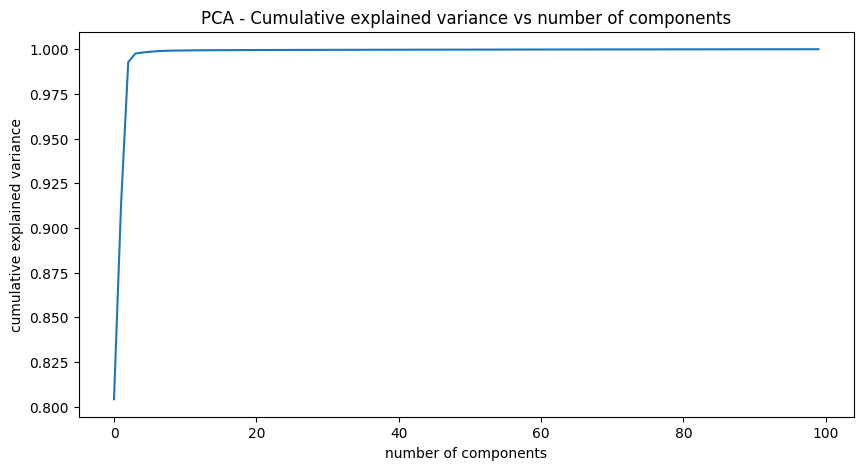

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca = PCA(n_components=4808,random_state=42)
x_pca=pca.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

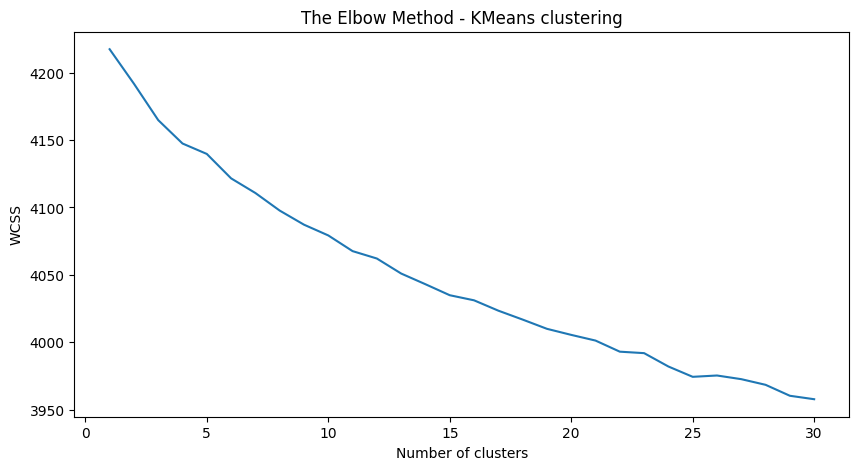

In [ ]:
# Elbow method to find the optimal value of k
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

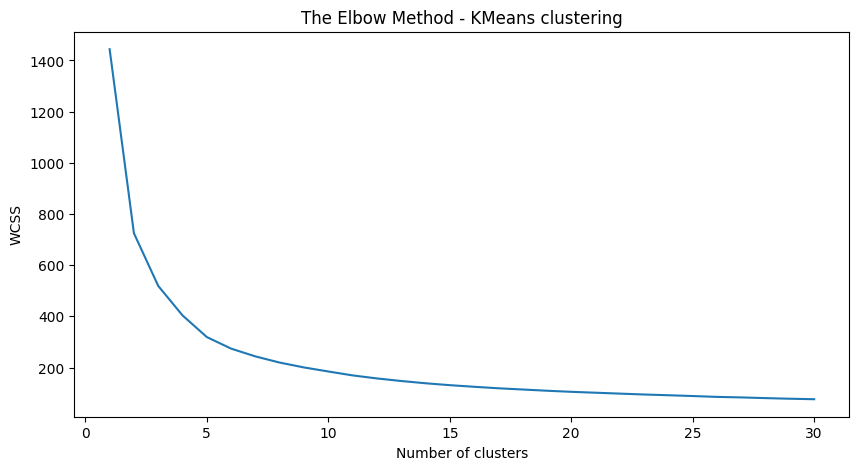

In [ ]:
# Elbow method to find the optimal value of k
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

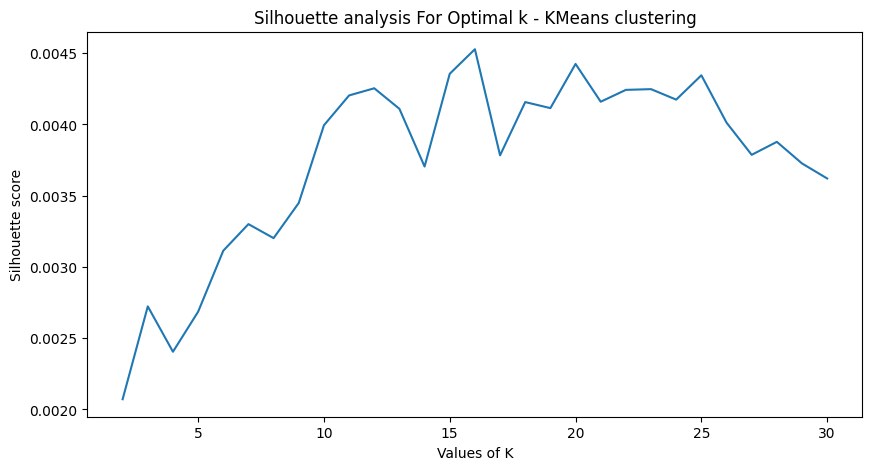

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

Automatically created module for IPython interactive environment


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.43313837


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3718124


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.38986927


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.34712481


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.31122655


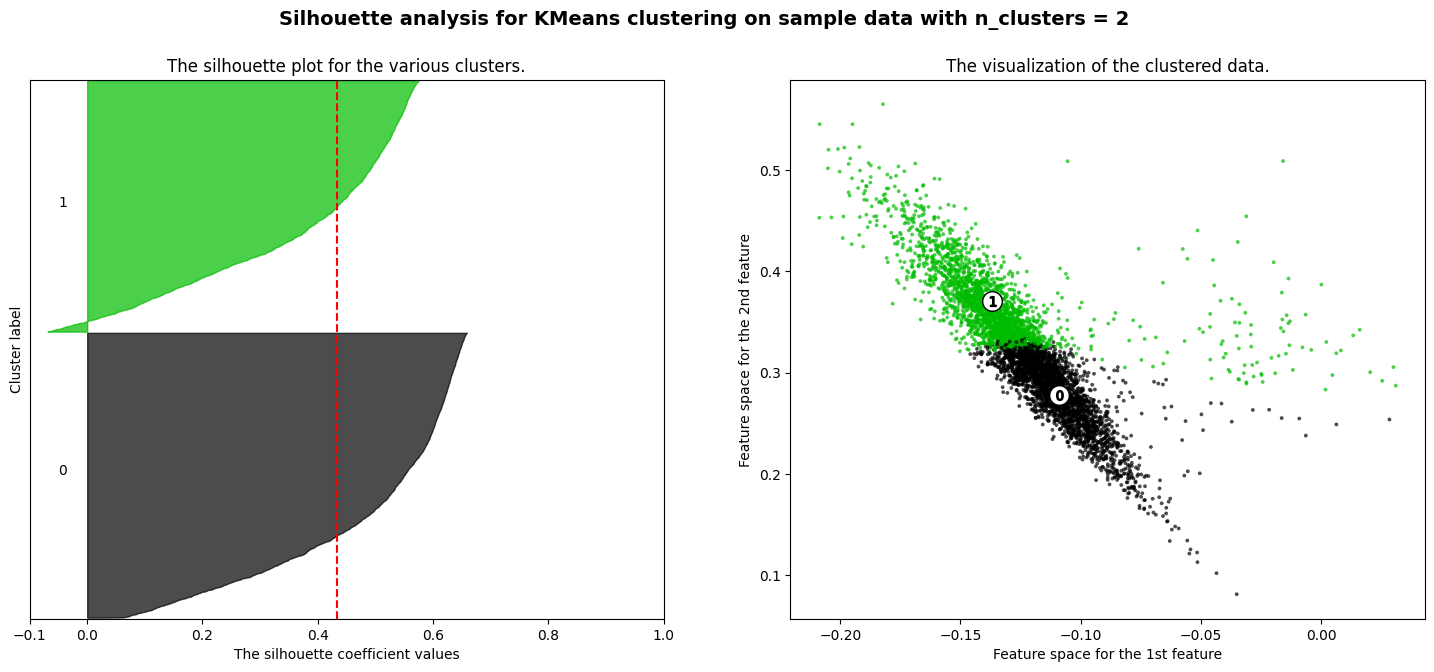

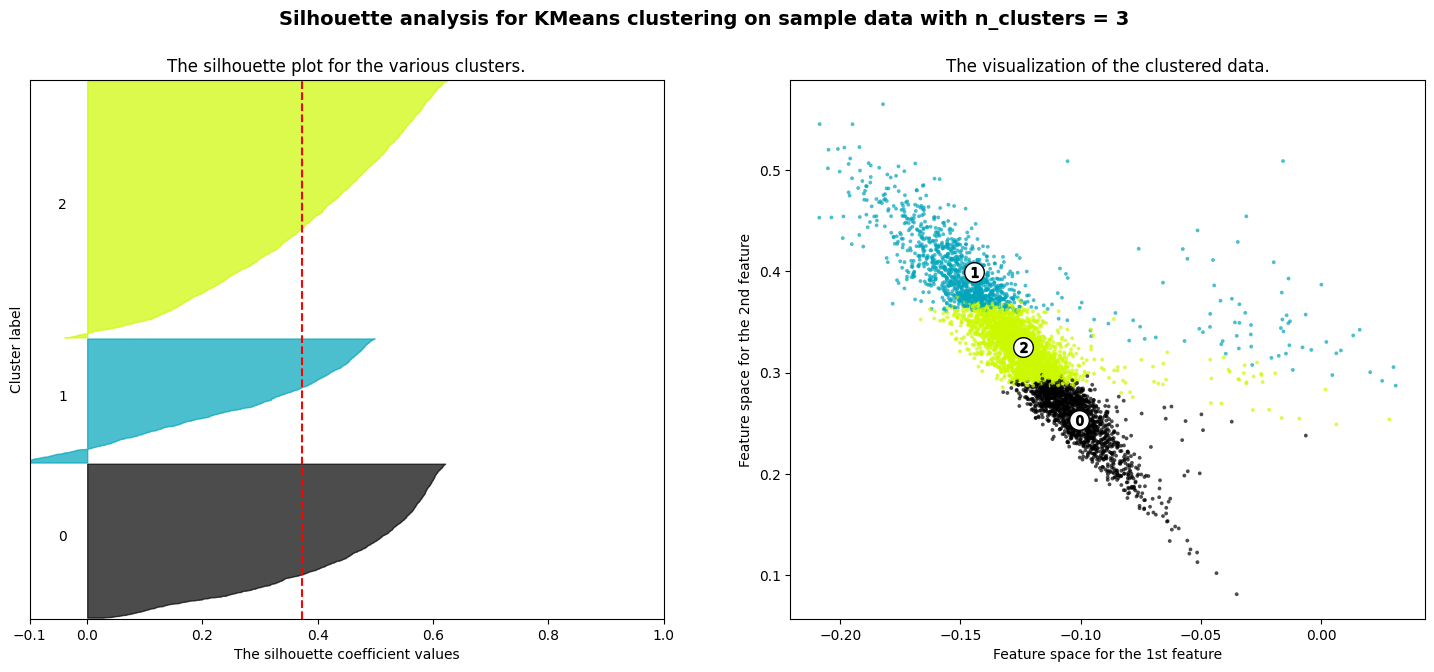

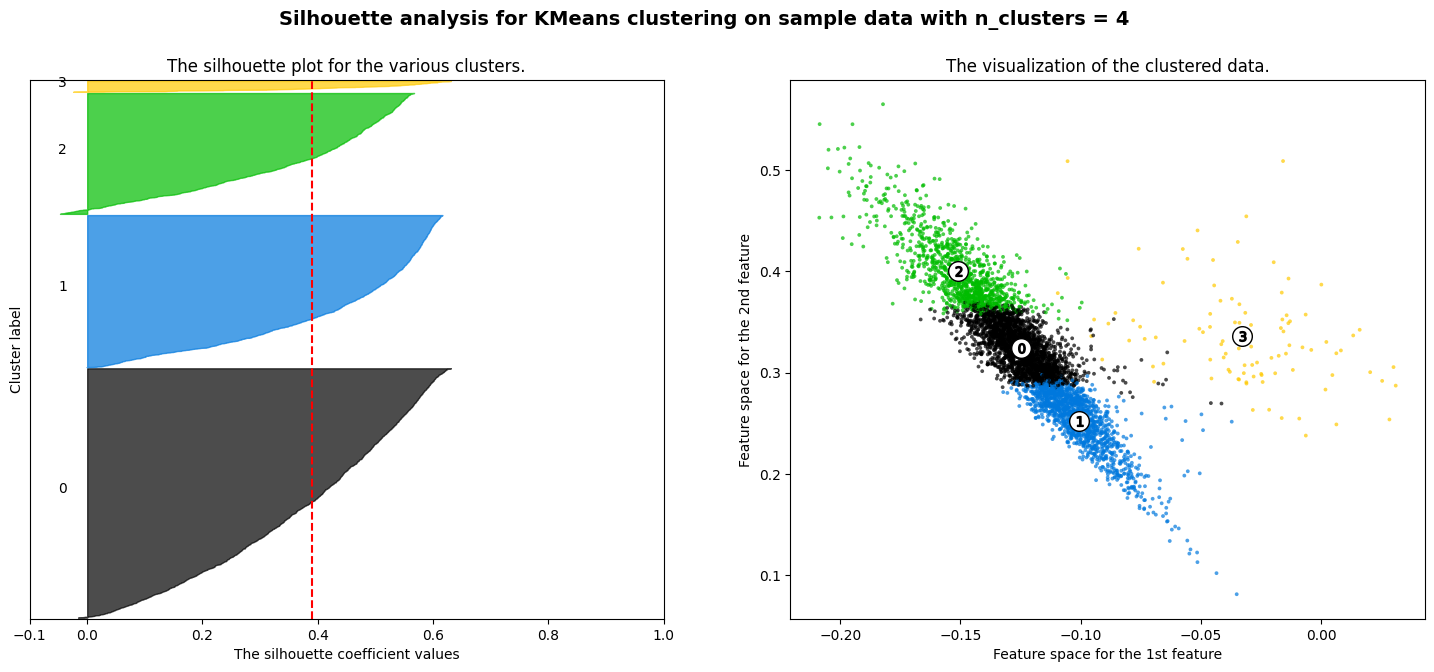

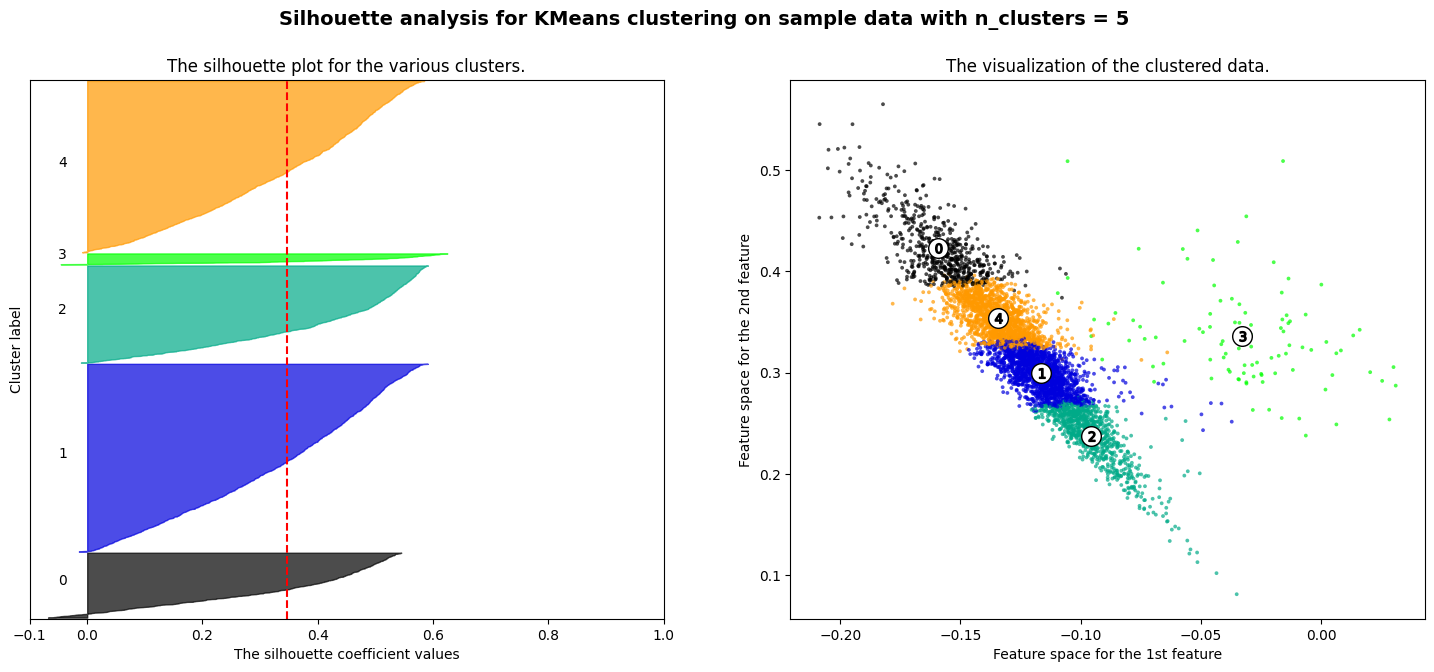

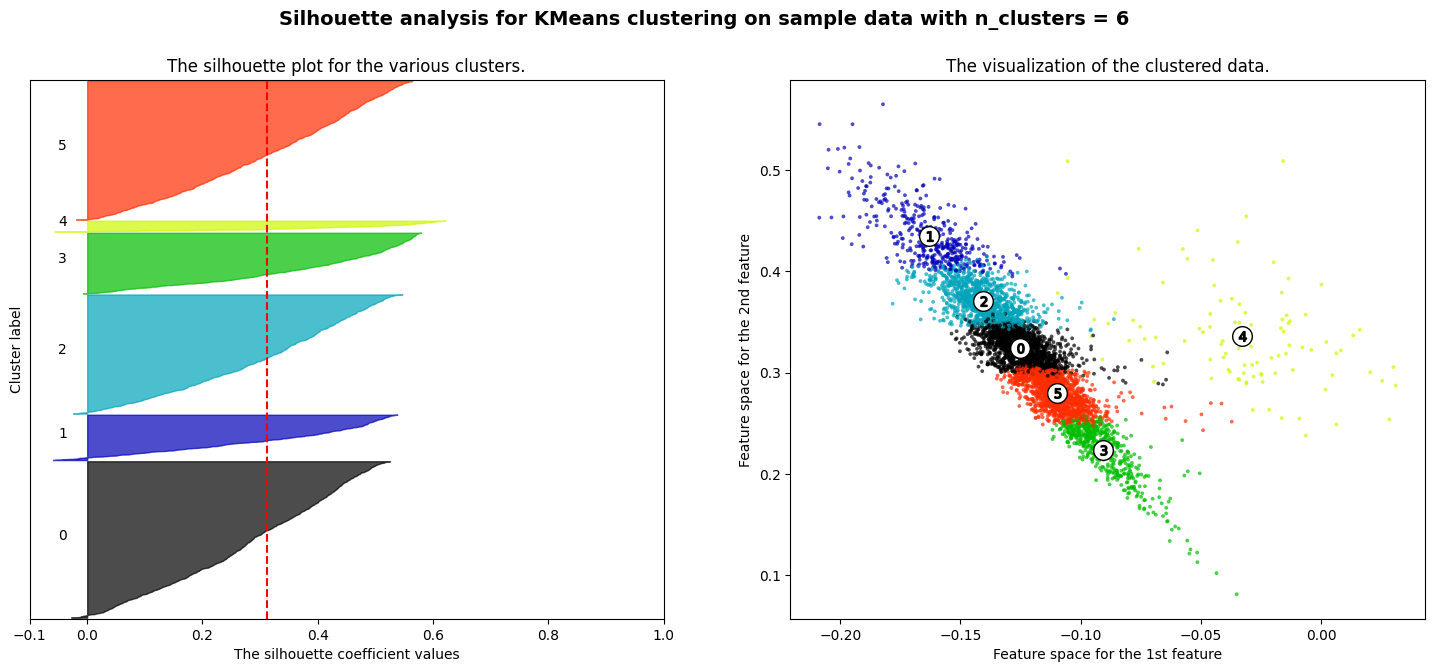

In [ ]:

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_




array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(2, 2000)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'WCSS')

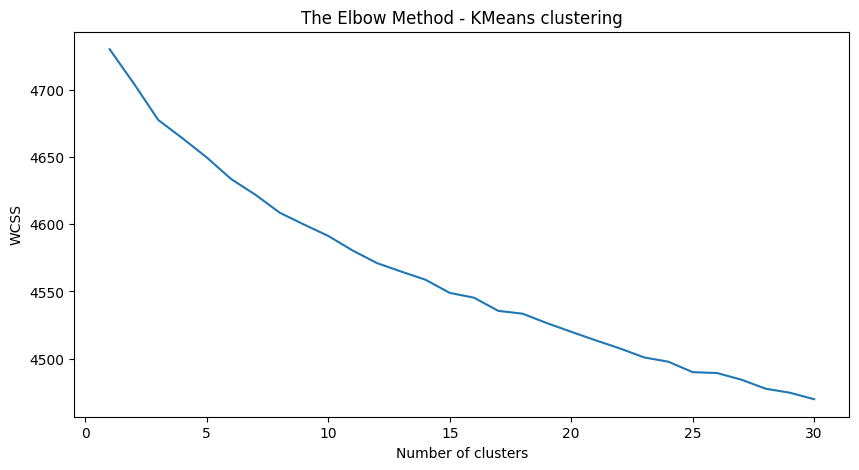

In [ ]:
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,719demin bichir hctor bonilla oscar serrano az...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2359tedd chan stella chung henley hii lawrence...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9elijah wood john c reilly jennifer connelly c...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,21jim sturgess kevin spacey kate bosworth aaro...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,50,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,46erdal beikiolu yasemin allen melis birkan sa...


In [ ]:
#X_train combined with other features


array([[-0.09542369,  0.24141693,  0.18791085, ..., -0.2371159 ,
         0.0555289 ,  0.11429179],
       [-0.12115546,  0.3245455 ,  0.25339785, ..., -0.317495  ,
         0.06389998,  0.14734954],
       [-0.15015565,  0.41871956,  0.32664016, ..., -0.410885  ,
         0.0821654 ,  0.19139732],
       ...,
       [-0.15619785,  0.3786464 ,  0.29530725, ..., -0.36242154,
         0.101927  ,  0.18434212],
       [-0.12459131,  0.35729614,  0.28694406, ..., -0.36705047,
         0.07053925,  0.14927304],
       [-0.12827215,  0.35417262,  0.2782755 , ..., -0.36637878,
         0.07561489,  0.14553891]], dtype=float32)